# <center> Chapter 2 End to End ML Project </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

## Getting the data 

In [3]:
os.getcwd()

'/Users/kshitijdeshpande/Documents/GitHub/Hands-on-ML2'

In [4]:
housing = pd.read_csv('/Users/kshitijdeshpande/Documents/GitHub/Hands-on-ML2/datasets/housing/housing.csv')

## Preliminary data check 

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

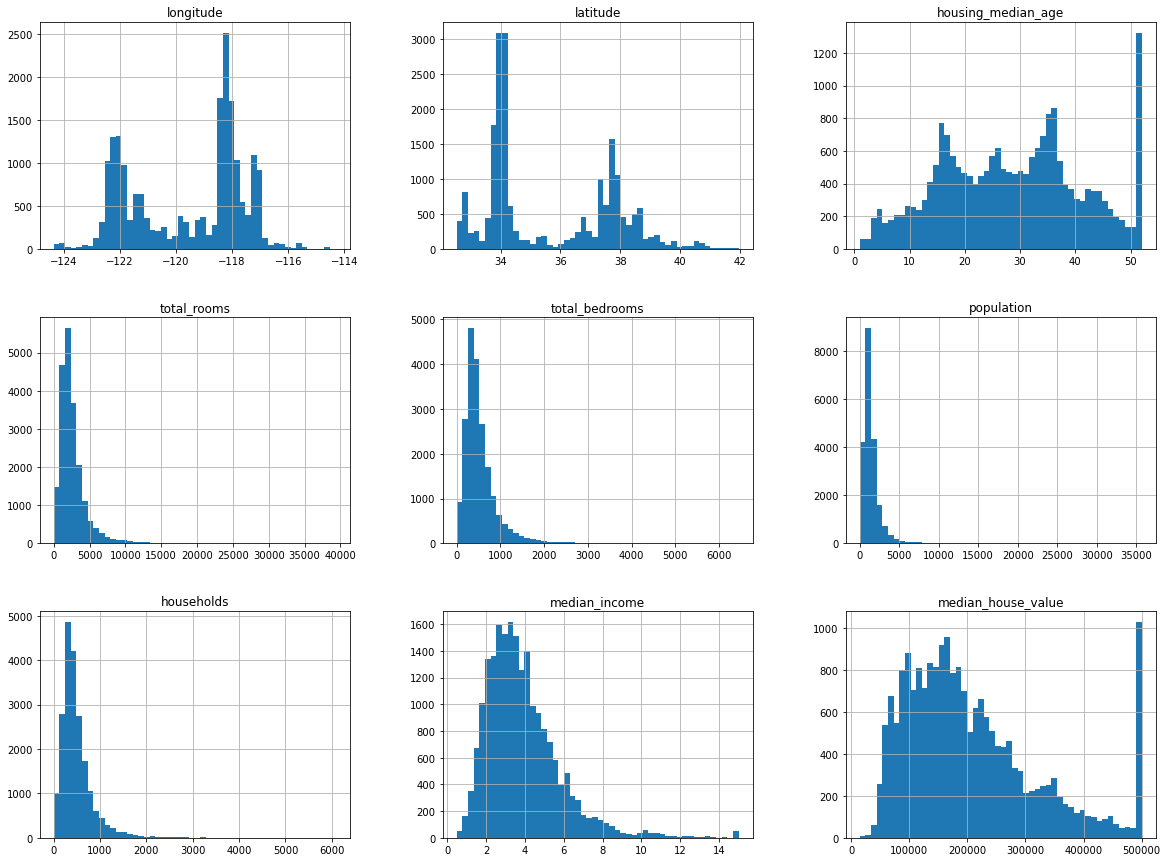

In [7]:
%matplotlib inline

housing.hist(bins=50, figsize=(20,15))

In [8]:
housing['income_cat'] = pd.cut(housing['median_income']
                               , bins=[0,1.5,3,4.5,6,np.inf]
                               , labels=[1,2,3,4,5])

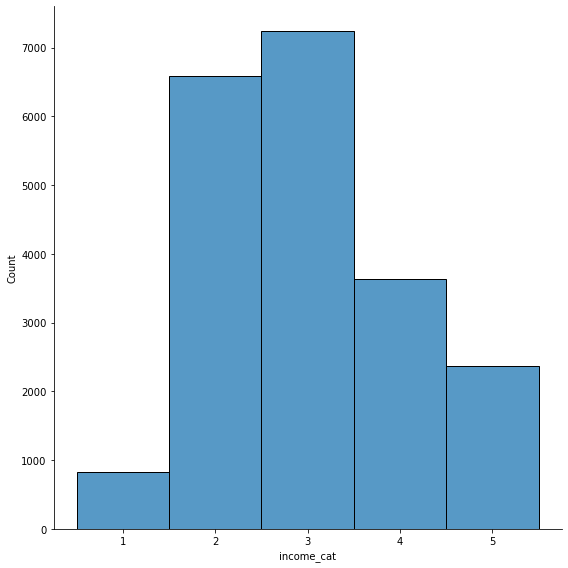

In [9]:
sns.displot(data=housing, x='income_cat', height=8)

## Train test split 

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [12]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

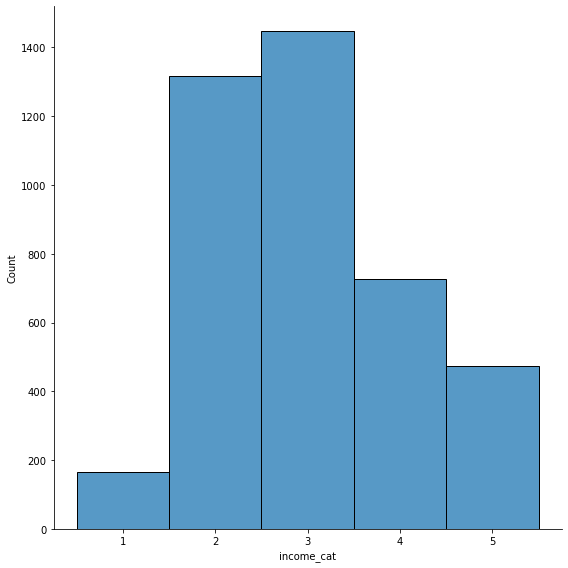

In [13]:
sns.displot(data=strat_test_set, x='income_cat', height=8)

## EDA 

In [38]:
strat_test_set.drop(columns='income_cat',axis=1,inplace=True)
strat_train_set.drop(columns='income_cat',axis=1,inplace=True)

In [39]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

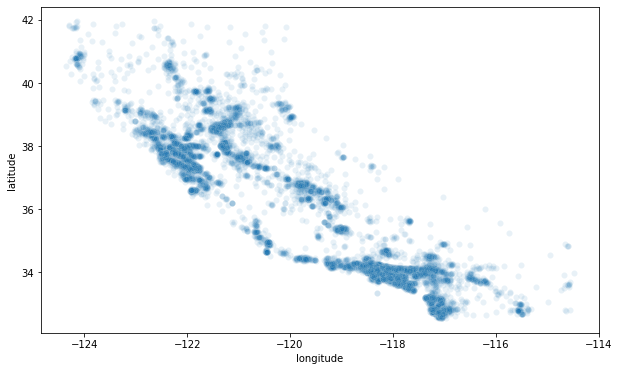

In [40]:
plt.figure(figsize=(10,6)) 
sns.scatterplot(data=housing, x='longitude',y='latitude',alpha=0.1) # shouldn't it be the other way round? (Alpha for opacity)

No handles with labels found to put in legend.


<Figure size 720x504 with 0 Axes>

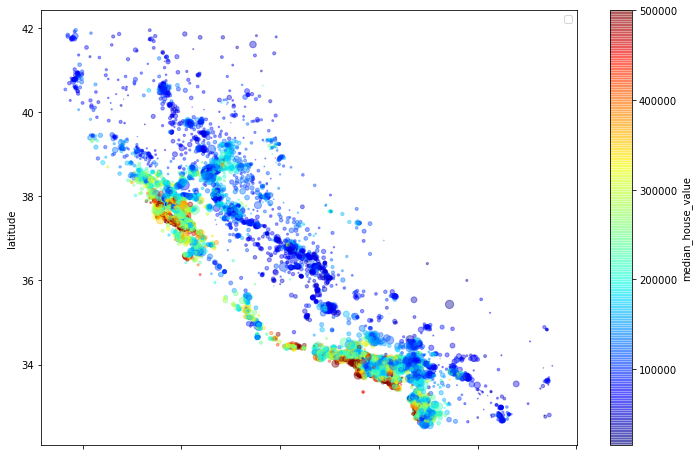

In [41]:
plt.figure(figsize=(10,7))
housing.plot(kind='scatter', x='longitude', y='latitude'
                , alpha=0.4
                , s=housing['population']/100
                , c='median_house_value', cmap=plt.get_cmap('jet')
                , figsize=(12,8))
plt.legend()

In [42]:
corr_matrix = housing.corr()

<AxesSubplot:>

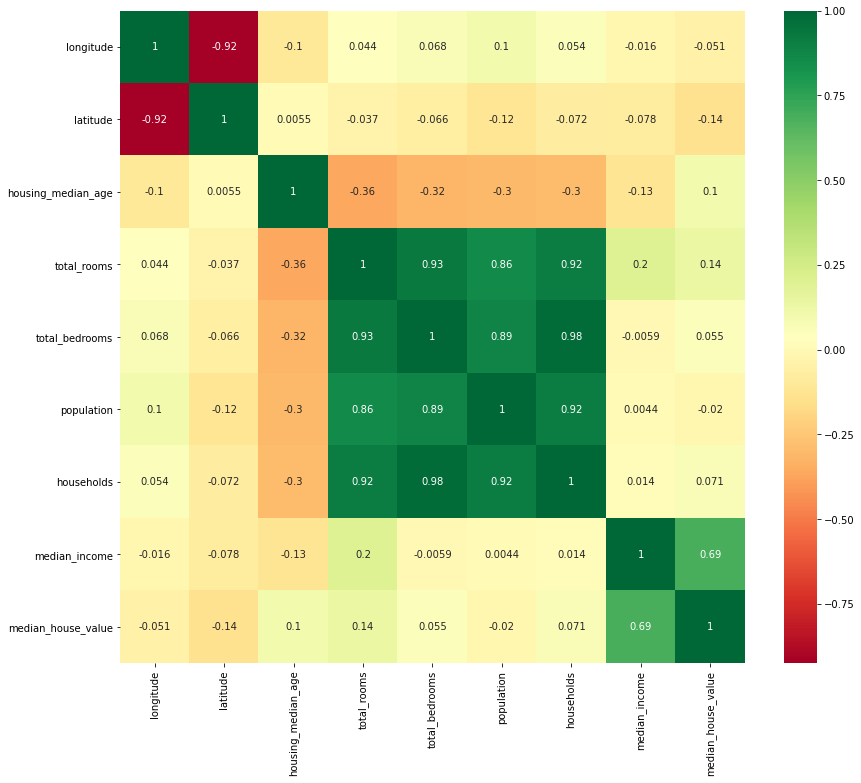

In [43]:
plt.figure(figsize=(14,12))
sns.heatmap(data=housing.corr(), annot=True, cmap='RdYlGn')

In [44]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

<AxesSubplot:>

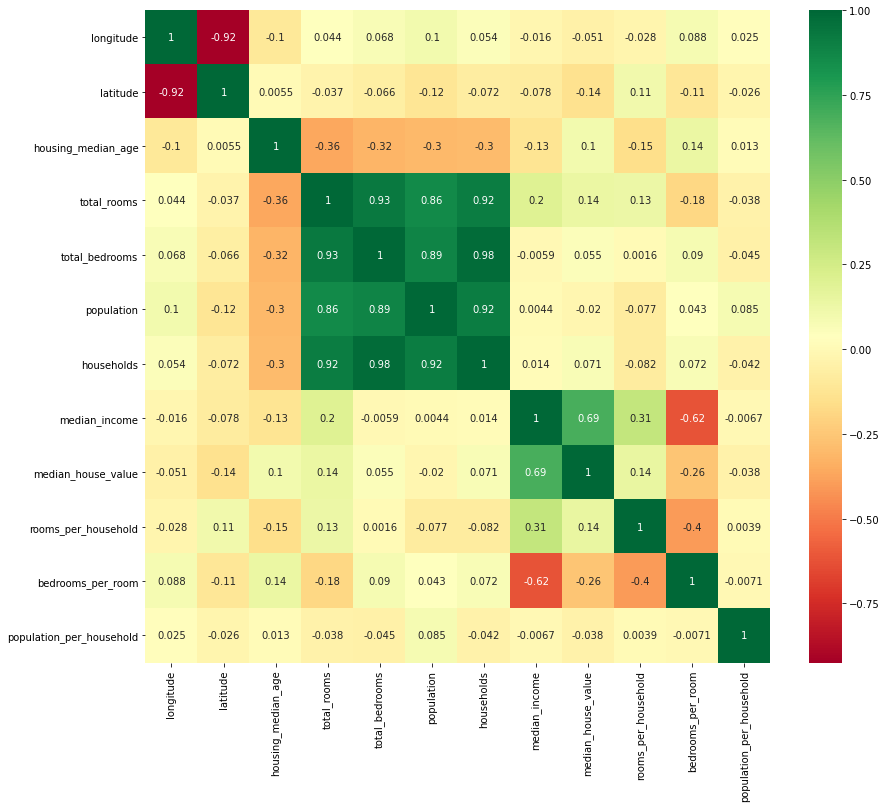

In [45]:
plt.figure(figsize=(14,12))
sns.heatmap(data=housing.corr(), annot=True, cmap='RdYlGn')

## Preprocessing 

In [46]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set.median_house_value.copy()

In [47]:
from sklearn.impute import SimpleImputer

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

In [49]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17950,-118.15,34.16,52.0,1925.0,597.0,2258.0,594.0,1.6921,<1H OCEAN
19445,-118.48,34.05,48.0,3623.0,528.0,1282.0,516.0,9.5221,<1H OCEAN
15413,-118.25,33.93,42.0,657.0,147.0,526.0,132.0,2.5000,<1H OCEAN
4371,-120.54,38.07,37.0,736.0,148.0,339.0,140.0,2.2875,INLAND
2921,-117.32,33.17,18.0,2143.0,299.0,828.0,283.0,4.2383,NEAR OCEAN


In [50]:
rooms_ix, bedroom_ix, population_ix, households_ix = 3, 4, 5, 6

In [51]:
housing.iloc[:,[rooms_ix, bedroom_ix, population_ix, households_ix]]

,total_rooms,total_bedrooms,population,households
17950,1925.0,597.0,2258.0,594.0
19445,3623.0,528.0,1282.0,516.0
15413,657.0,147.0,526.0,132.0
4371,736.0,148.0,339.0,140.0
2921,2143.0,299.0,828.0,283.0
...,...,...,...,...
5215,39320.0,6210.0,16305.0,5358.0
12228,1167.0,370.0,253.0,137.0
13741,1554.0,242.0,553.0,230.0
10730,574.0,103.0,321.0,103.0


In [52]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedroom_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [61]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
from sklearn.compose import ColumnTransformer

### Pipeline

In [55]:
from sklearn.pipeline import Pipeline

In [56]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17950,-118.15,34.16,52.0,1925.0,597.0,2258.0,594.0,1.6921,<1H OCEAN
19445,-118.48,34.05,48.0,3623.0,528.0,1282.0,516.0,9.5221,<1H OCEAN
15413,-118.25,33.93,42.0,657.0,147.0,526.0,132.0,2.5000,<1H OCEAN
4371,-120.54,38.07,37.0,736.0,148.0,339.0,140.0,2.2875,INLAND
2921,-117.32,33.17,18.0,2143.0,299.0,828.0,283.0,4.2383,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
5215,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,INLAND
12228,-122.08,37.68,26.0,1167.0,370.0,253.0,137.0,2.4196,NEAR BAY
13741,-121.47,39.49,17.0,1554.0,242.0,553.0,230.0,3.2174,INLAND
10730,-117.68,34.04,27.0,574.0,103.0,321.0,103.0,3.9107,INLAND


In [57]:
num_attribs = list(housing.drop(columns='ocean_proximity',axis=1).columns)
cat_attribs = ['ocean_proximity']

In [58]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [59]:
num_pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy='median'))
                , ('attribs_adder', CombinedAttributesAdder())
                , ('std_scalar', StandardScaler())
])

In [62]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline, num_attribs)
    , ('cat',OneHotEncoder(), cat_attribs)
])

In [63]:
housing_prepared = full_pipeline.fit_transform(housing)

In [66]:
housing_prepared.shape

(16512, 16)

## Model selection 

### Linear Regression 

In [73]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)

some_data = housing[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('Predictions: ', list(lin_reg.predict(housing_prepared[:5])))

print('Labels: ', list(some_labels))

Predictions:  [138861.71168367867, 475316.78145543777, 175868.21146834103, 85385.32474740178, 218425.4240588632]
Labels:  [162500.0, 500001.0, 110200.0, 79900.0, 239000.0]


### Decision Tree 

In [74]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_labels)

some_data = housing[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('Predictions: ', list(tree_reg.predict(housing_prepared[:5])))

print('Labels: ', list(some_labels))

Predictions:  [162500.0, 500001.0, 110200.0, 79900.0, 239000.0]
Labels:  [162500.0, 500001.0, 110200.0, 79900.0, 239000.0]


### Random Forest 

In [75]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared, housing_labels)

some_data = housing[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('Predictions: ', list(forest_reg.predict(housing_prepared[:5])))

print('Labels: ', list(some_labels))

Predictions:  [161734.0, 498728.97, 107589.0, 89958.0, 263876.1]
Labels:  [162500.0, 500001.0, 110200.0, 79900.0, 239000.0]


### RMSE on train set 

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

67765.52351665356


In [78]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


In [79]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

18460.039924364428


### Cross validation RMSE scores 

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('St Dev: ', scores.std())

In [82]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores:  [70434.06225577 71127.01182084 68794.63839581 68716.33660625
 70835.5441825  65984.12977285 66246.18637797 65025.67444525
 64779.88831734 68501.99110804]
Mean:  68044.54632826251
St Dev:  2268.8155320341352


In [83]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores:  [73602.19780165 72969.3545068  70236.09477939 69758.54112839
 74270.77013929 68469.55721232 67019.46871409 69603.50284057
 72796.25208033 70252.44801008]
Mean:  70897.81872129218
St Dev:  2266.0851463508534


In [84]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores:  [50773.51124968 53855.1323373  48431.13650887 49236.65997348
 51529.59431186 48060.26404836 46121.78712976 47972.42697736
 49580.69024225 52003.59994766]
Mean:  49756.48027265897
St Dev:  2176.1301026941255


## Hyperparameter tuning 

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid = [
    {'n_estimators': [3,10,20], 'max_features': [2,4,6,8]}
    , {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

In [87]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)a

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 20]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [88]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 20}

In [89]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=20)

In [90]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score), params)

65083.01229238336 {'max_features': 2, 'n_estimators': 3}
54871.10773300713 {'max_features': 2, 'n_estimators': 10}
52903.4836833733 {'max_features': 2, 'n_estimators': 20}
59008.26744310466 {'max_features': 4, 'n_estimators': 3}
52323.5100731865 {'max_features': 4, 'n_estimators': 10}
50744.99219725178 {'max_features': 4, 'n_estimators': 20}
59366.18956958896 {'max_features': 6, 'n_estimators': 3}
51326.129541572445 {'max_features': 6, 'n_estimators': 10}
50372.18379258368 {'max_features': 6, 'n_estimators': 20}
58339.74887237415 {'max_features': 8, 'n_estimators': 3}
51905.289288234635 {'max_features': 8, 'n_estimators': 10}
50487.112710215304 {'max_features': 8, 'n_estimators': 20}
61997.12443891136 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53713.69883543728 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60074.17005018561 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51944.10078094568 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

## Feature importance 

In [93]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.11809247e-02, 6.85772594e-02, 4.35910370e-02, 1.68974618e-02,
       1.75163349e-02, 1.67639719e-02, 1.54398881e-02, 2.80267876e-01,
       6.39853523e-02, 1.05219982e-01, 9.72929472e-02, 1.51042412e-02,
       1.67410593e-01, 2.56939808e-04, 4.83799266e-03, 5.65719825e-03])

In [94]:
cat_encoder = full_pipeline.named_transformers_['cat']
cat_1hot_attribs = list(cat_encoder.categories_[0])

extra_attribs = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']

attributes = num_attribs + extra_attribs + cat_1hot_attribs

In [97]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.28026787628905725, 'median_income'),
 (0.16741059260286004, 'INLAND'),
 (0.10521998184772705, 'pop_per_hhold'),
 (0.0972929471962049, 'bedrooms_per_room'),
 (0.08118092466631749, 'longitude'),
 (0.06857725944859766, 'latitude'),
 (0.06398535230209072, 'rooms_per_hhold'),
 (0.04359103695673549, 'housing_median_age'),
 (0.017516334868568306, 'total_bedrooms'),
 (0.01689746184013199, 'total_rooms'),
 (0.016763971923980332, 'population'),
 (0.015439888098931789, 'households'),
 (0.015104241236705875, '<1H OCEAN'),
 (0.0056571982508394555, 'NEAR OCEAN'),
 (0.004837992663176981, 'NEAR BAY'),
 (0.0002569398080747853, 'ISLAND')]

## Test set scores 

In [98]:
final_model = grid_search.best_estimator_

In [99]:
X_test = strat_test_set.drop(columns='median_house_value',axis=1)
X_test_prepared = full_pipeline.transform(X_test)

y_test = strat_test_set['median_house_value']

In [100]:
final_predictions = final_model.predict(X_test_prepared)

In [101]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49973.6553042147

### Confidence Interval 

In [104]:
from scipy import stats
ci = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(ci, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([47588.84551904, 52249.72948345])

## Exercises 

### Q1

In [106]:
from sklearn.svm import SVR

In [110]:
param_grid = [
    {'kernel': ['linear'], 'C': [1,10,100]}
    , {'kernel': ['rbf'], 'C': [1,10,100], 'gamma': ['scale', 'auto']}
]

In [111]:
svm_reg = SVR()

In [112]:
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': ['scale', 'auto'],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [113]:
grid_search.best_estimator_

SVR(C=100, kernel='linear')

In [114]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score), params)

112033.1120255403 {'C': 1, 'kernel': 'linear'}
84337.35746153032 {'C': 10, 'kernel': 'linear'}
73407.27709527432 {'C': 100, 'kernel': 'linear'}
118184.85698075322 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
118189.47381379793 {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
115594.29796644396 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
115620.38035962518 {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
97419.50453912946 {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
97339.61305319809 {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


## Q2 

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [157]:
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

In [158]:
rnd_search = RandomizedSearchCV(svm_reg,
                                param_distributions=param_distribs,
                                n_iter=10, cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)

In [159]:
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd78ab686a0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd78ab55160>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [160]:
rvres = rnd_search.cv_results_
for mean_score, params in zip(rvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score), params)

273.98207725608387 {'C': 1, 'kernel': 'linear'}
257.493735795602 {'C': 10, 'kernel': 'linear'}
319.4259620528902 {'C': 100, 'kernel': 'linear'}
273.07084886301914 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
344.05925114149284 {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
263.8904576289902 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
329.40008999185113 {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
280.7959675222514 {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
250.58532117641928 {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [162]:
new_final = rnd_search.best_estimator_

In [163]:
new_final_predictions = final_model.predict(X_test_prepared)

In [164]:
new_final_mse = mean_squared_error(y_test, new_final_predictions)
new_final_rmse = np.sqrt(new_final_mse)
new_final_rmse

49973.6553042147

## Q3 

In [166]:
from sklearn.feature_selection import SelectFromModel

In [167]:
new_full_pipeline = Pipeline([
    ('preparation', full_pipeline)
    , ('feature_selection', SelectFromModel(grid_search.best_estimator_, threshold=0.005))
])

In [170]:
new_housing_prepared = new_full_pipeline.fit_transform(housing, housing_labels)


In [173]:
new_final.fit(new_housing_prepared, housing_labels)

SVR(C=157055.10989448498, gamma=0.26497040005002437)

In [175]:
new_final_predictions = new_final.predict(new_housing_prepared)
new_final_mse = mean_squared_error(housing_labels, new_final_predictions)
new_final_rmse = np.sqrt(new_final_mse)
new_final_rmse

47710.74484990199

## Q4

In [178]:
final_pipeline = Pipeline([
    ('prep_selector', new_full_pipeline)
    , ('svr', rnd_search.best_estimator_.predict())
])

TypeError: predict() missing 1 required positional argument: 'X'